In [ ]:
import numpy as np
import os.path as op
import os
import matplotlib.pyplot as plt
from langouEEG import *

import mne
import pickle
from mne.datasets import sample
from mne.minimum_norm import apply_inverse_epochs, read_inverse_operator
from mne.connectivity import spectral_connectivity
from mne.viz import circular_layout, plot_connectivity_circle
import mne
from mne.datasets import eegbci
from mne.datasets import fetch_fsaverage
from mne.datasets import sample
from mne.minimum_norm import make_inverse_operator, apply_inverse
from mne.minimum_norm import write_inverse_operator
dataRoot = "/data/home/viscent/Light"
import numpy as np
import os.path as op
import os
import matplotlib.pyplot as plt
from langouEEG import *

import mne
import pickle
from mne.datasets import sample
from mne.minimum_norm import apply_inverse_epochs, read_inverse_operator
from mne.connectivity import spectral_connectivity
from mne.viz import circular_layout, plot_connectivity_circle
import mne
from mne.datasets import eegbci
from mne.datasets import fetch_fsaverage
from mne.datasets import sample
from mne.minimum_norm import make_inverse_operator, apply_inverse
from mne.minimum_norm import write_inverse_operator
dataRoot = "/data/home/viscent/Light"

# Loading data


/data/home/viscent/Light
/data/home/viscent/Light/Light/S12 Data.cnt
Reading 0 ... 1160999  =      0.000 ...  2321.998 secs...
/data/home/viscent/Light/LangouEEG/langouEEG.py:110: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(file_path, preload=True)
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
file info:
<Info | 10 non-empty values
 bads: 1 items (Trigger)
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 64 EEG, 1 EOG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: Average EEG reference: off
 sfreq: 500.0 Hz
 subject_info: 5 items (dict)
>
channel names:
['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC

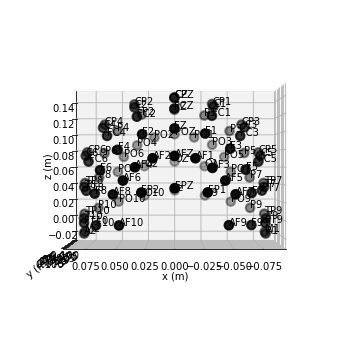

6 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6, PO9/CB1, PO10/CB2
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


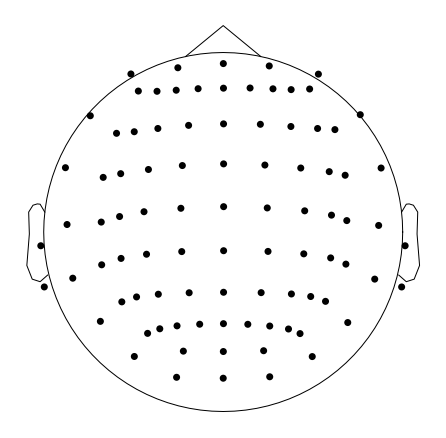

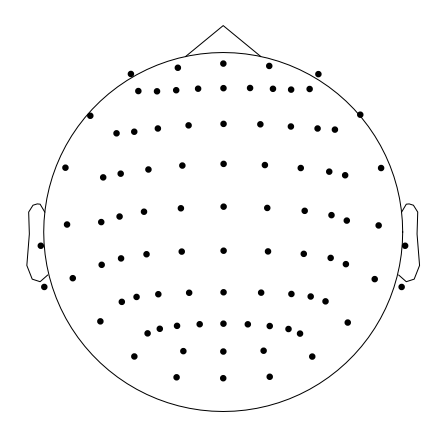

In [16]:
subject_name = 'S12'
raw,picks,picks_str = initData(subject_name)
raw.set_channel_types({'Trigger':'stim','VEO':'eog'})
raw.set_eeg_reference(projection=True)
events, event_dict=extractEvents(raw)
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=True,
                    exclude='bads')
quikMontage = mne.channels.read_custom_montage(os.path.join(dataRoot,'LangouEEG','quikCap.elc'))
raw_1020 = raw.copy().set_montage(quikMontage)
quikMontage.plot(kind='3d')
quikMontage.plot(kind='topomap', show_names=False)

In [ ]:
raw.crop(tmin=300, tmax=400).plot()

In [ ]:
raw = filterRaw(raw, picks, ref_set_average=True, ref_channels=['M1', 'M2'])

In [ ]:
raw.plot()

In [ ]:
raw = runICA(raw)

In [ ]:
raw.plot()